## Importing libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Understanding and Analysing 

In [2]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape
#9200 rows and 37 columns to begin with 

(9240, 37)

In [4]:
df.describe()
# Only 7 columns are numeric
#Totalvisits,page views per visit,Time spent on website seems to have outliers

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.info()
# few columns are float
#several missing values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.isnull().sum()/len(df)*100
#analysing missing values in percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
df.nunique()
# Checking to drop values with single unique numbers. 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
df=df.replace('Select',np.nan)
#after analysing, majority of columns have select value which means nothing , so replacing it with NAN for adequate treatment 

#### Dropping columns having more than 40% missing values and unique value columns 

In [9]:
# Let us Drop unique valued columns
df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],inplace=True,axis=1)
df.shape

(9240, 32)

In [10]:
#Fetching columns having null values more than 40%
null = df.isnull().sum()
null = null[null>= 0.4*len(df)]
len(null)

7

In [11]:
null = list(null[null.values>=0.4].index)
df.drop(labels=null,axis=1,inplace=True)
df.shape
#25 columns left for further processing 

(9240, 25)

In [12]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
#Imputing Mode at null value (Maximum is google), also putting variable in 'others category' where value is less than 10
df['Lead Source']=df['Lead Source'].replace(['google',np.nan],'Google')
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel'
                                            ,'testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'others')
df['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
others                23
Name: Lead Source, dtype: int64

#### Treatment of other variables 

In [14]:
df['TotalVisits']=df['TotalVisits'].replace(np.nan,0.0)
df['TotalVisits'].value_counts(dropna=False)

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [15]:
df['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [16]:
df['Page Views Per Visit']=df['Page Views Per Visit'].replace(np.nan,0.00)
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [17]:
 df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
#Replacing NAN with "Email Opened" and less values in 'Others'
df['Last Activity']= df['Last Activity'].replace(np.nan,'Email Opened')
df['Last Activity']= df['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received',
                                                 'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
                                                ,'Others')
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [19]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
df['Country']=df['Country'].replace(np.nan,"Not Specified")

In [21]:
#a funtion to create three major categories 1. India, 2.Outside_India, 3. Unknown
def countries(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Specified":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

df['Country'] = df.apply(lambda x:countries(x['Country']), axis = 1)
df['Country'].value_counts()

India            6492
Unknown          2461
Outside India     287
Name: Country, dtype: int64

#### Majorly three categories divided(countries) to reduce number of variables 

In [22]:
#treatment of Specialization variables
df['Specialization'].fillna("Not Specified",inplace=True)

In [23]:
#Treating Select entry present in majority of columns 
df['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
df['What is your current occupation'].fillna('Not Specified',  inplace=True)
df['What matters most to you in choosing a course'].fillna('Not Specified', inplace=True)

In [25]:
#converting float values to integar for better result

df['TotalVisits']=df['TotalVisits'].astype('int')
df['Page Views Per Visit']=df['Page Views Per Visit'].astype('int')

In [26]:
df.shape

(9240, 25)

In [27]:
df.isnull().sum()
#2 columns left untreated 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [28]:
#checking value counts of Tag variable
round(100*df['Tags'].value_counts(normalize = True,dropna=False),2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [29]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Unknown')

In [30]:
#checking value counts of "City" column

round(100*df['City'].value_counts(normalize = True,dropna=False),2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [31]:
df['City'] = df['City'].replace(np.nan,'Unknown')
#treated City column

In [32]:
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [33]:
#cleaning on Last Notable activity 
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [34]:
df['Last Notable Activity']=df['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront',
                                                                 'Resubscribed to emails','View in browser link Clicked','Form Submitted on Website',
                                                                'Email Received'],'Others')

In [35]:
# Removing Id values since they are unique for everyone
df.drop(['Prospect ID','Lead Number'],inplace=True,axis=1)
df.shape

(9240, 23)

In [36]:
# checking conversion ratio
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

## we have 38.5% conversion ratio

### EDA 

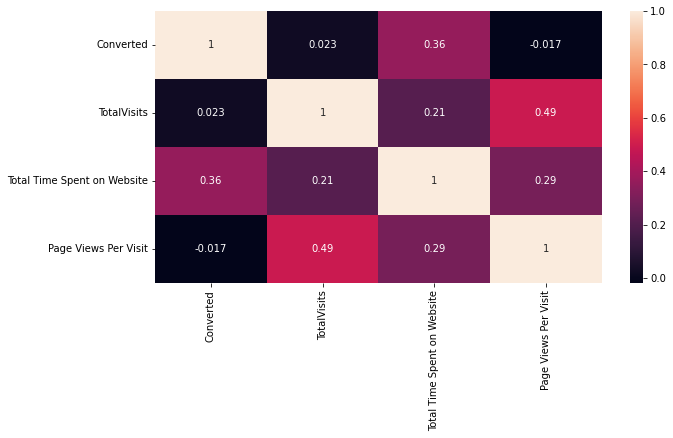

In [37]:
#to check coorelation between several numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Nothing concrete but seems to have some coorelation between conversion and total time spent on website 

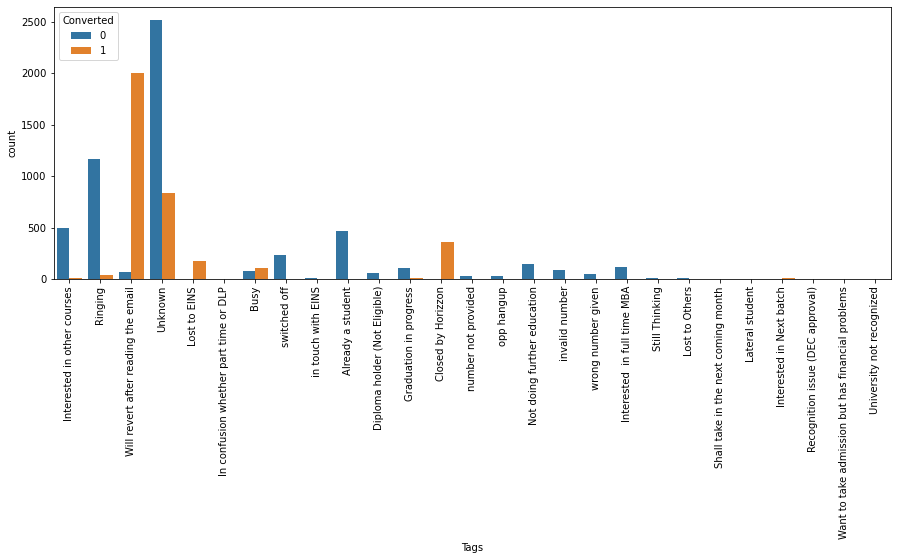

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df.Tags,hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

##### By looking at the plot, we can see that the highest conversion and the % of conversion occurs where the leads are contacted through the email
##### However, the Tags columns is not useful for final model building because the data shared by sales team, so  we may drop this at the time of model building

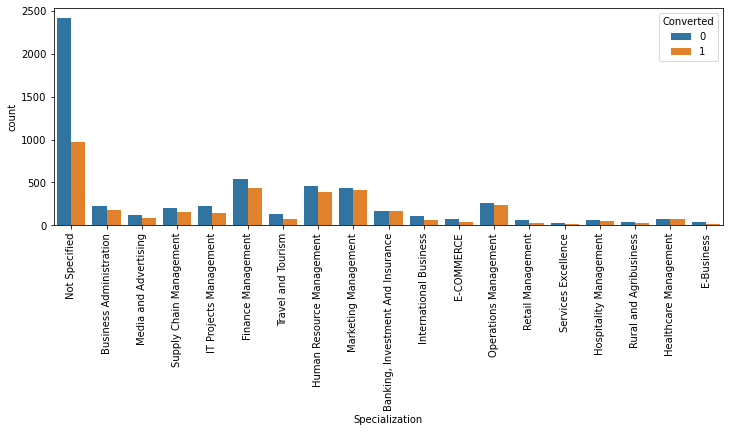

In [39]:
# Lets have a look on column "Specialization"

plt.figure(figsize=(12,4))
sns.countplot(df['Specialization'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [40]:
df['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- We can see that the information on number of converted are high in this section. So we cannot drop the column and also the rows. We can first combine categories based on the course type, and then impute proportionally to maintain the distribution unbiased

In [41]:
# categorize all management courses
df.loc[(df['Specialization']=='Finance Management') | (df['Specialization']=='Human Resource Management') | 
          (df['Specialization']=='Marketing Management') | (df['Specialization']=='Operations Management') | 
          (df['Specialization']=='IT Projects Management') | (df['Specialization']=='Supply Chain Management') | 
          (df['Specialization']=='Healthcare Management') | (df['Specialization']=='Hospitality Management') |
          (df['Specialization']=='Retail Management'), 'Specialization']='Management_Courses'

# categorize all business courses
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business_Courses'

# categorize all industry courses
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry_Courses'

In [42]:
round(df['Specialization'].value_counts(normalize=True)*100,1)

Management_Courses    46.0
Not Specified         36.6
Industry_Courses       9.7
Business_Courses       7.7
Name: Specialization, dtype: float64

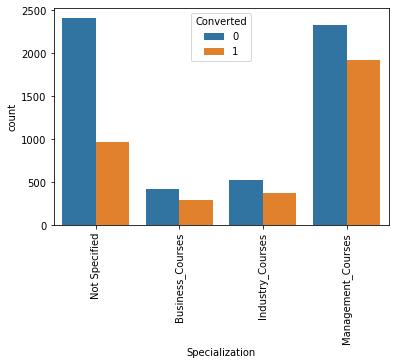

In [43]:
# Lets have a look on column "Specialization"

plt.figure(figsize=(6,4))
sns.countplot(df['Specialization'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

- It can be clearly seen from the graph that the "Management_courses" have high number of leads as well as the high % of converted leads.

In [44]:
df['Specialization']=df.Specialization.fillna(pd.Series(np.random.choice(['Management_Courses','Industry_Courses','Business_Courses'],
                                                                               p=[0.726,0.153,0.121],size=len(df))))

In [45]:
# Lets have a look on values of the column "What is your current occupation"
round((df['What is your current occupation'].value_counts(normalize=True))*100,2)

Unemployed              60.61
Not Specified           29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

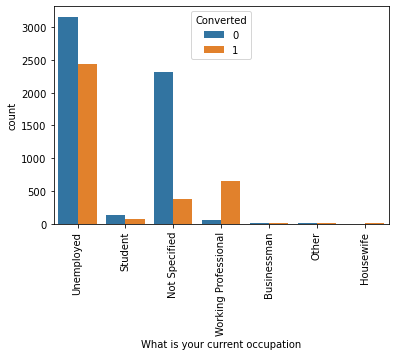

In [46]:
# Lets have a look on column "What is your current occupation"

plt.figure(figsize=(6,4))
sns.countplot(df['What is your current occupation'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [47]:
df['What is your current occupation'] = df['What is your current occupation'].apply(lambda x:x if x=='Unemployed' else 'Others')

- Combining the categories other than "Unemployed" to category named "Others"

In [48]:
# Again looking at te value counts of this column

round((df['What is your current occupation'].value_counts(normalize=True))*100,2)

Unemployed    60.61
Others        39.39
Name: What is your current occupation, dtype: float64

In [49]:
# Looking at the value counts of the "TotalVisits" column
df['TotalVisits'].value_counts()

0      2326
2      1680
3      1306
4      1120
5       783
6       466
1       395
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       16
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: TotalVisits, dtype: int64

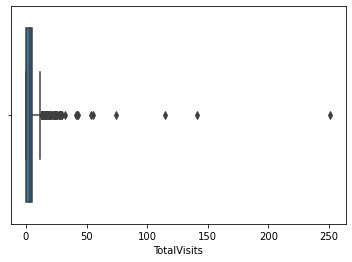

In [50]:
sns.boxplot(df['TotalVisits'])
plt.show()

- By looking at the TotalVisits column, we get to know that it is a numerical columns.
- The values of this column is highly skewed


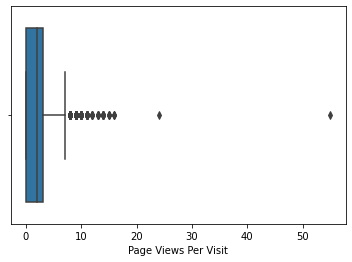

In [51]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()
#Rare but outliers existance is there

- This is also the numerical column having highly skewed values.
- Imputing the missing values of 'Page Views Per Visit' column by the median value.

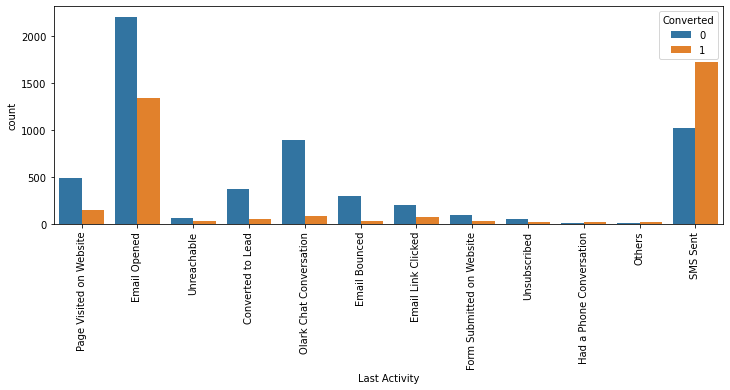

In [52]:
# Lets have a look on column "Last Activity"

plt.figure(figsize=(12,4))
sns.countplot(df['Last Activity'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

- The Open emails and sent sms seems to have high convertion ratio as per the graph

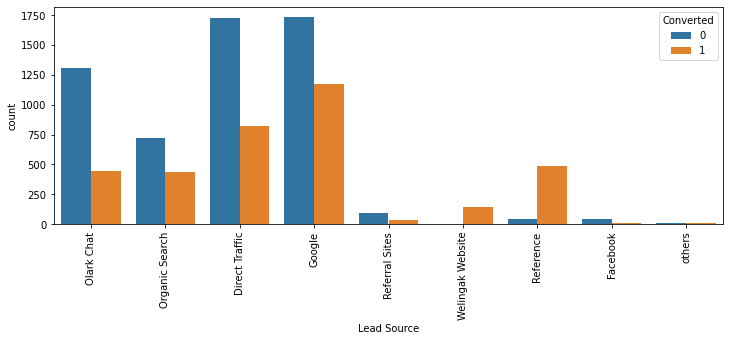

In [53]:
# Lets have a look on column "Lead Source"

plt.figure(figsize=(12,4))
sns.countplot(df['Lead Source'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

-  Maximum lead contributors are Direct Traffic and Google
- Whereas the conversion ration is high through reference, organic search, google, direct traffic and olark chat

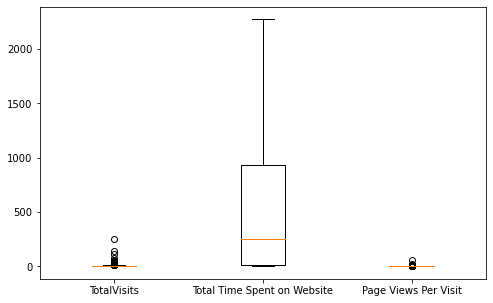

In [54]:
# Checking for the outliers present in the numerical features
plt.figure(figsize=(8,5))
plt.boxplot(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.xticks([1,2,3],['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

No Outliers present in the "Total Time Spent on Website" column
There are outliers present in "TotalVisits" and "Page Views Per Visit" columns

In [55]:
# Lets see the different levels of percentiles
df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.394156,2.259632
std,4.836682,2.167520
min,0.000000,0.000000
5%,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000


- The outlier presence is clearly visible, so we will treat it in subsequent cells 

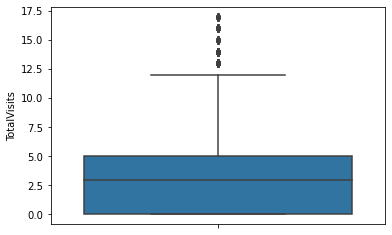

In [56]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

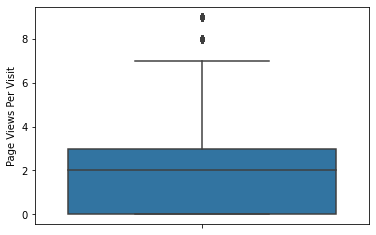

In [57]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3=df['Page Views Per Visit'].quantile(0.99)
df=df[df['Page Views Per Visit']<=Q3]
Q1=df['Page Views Per Visit'].quantile(0.01)
df=df[df['Page Views Per Visit']>=Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

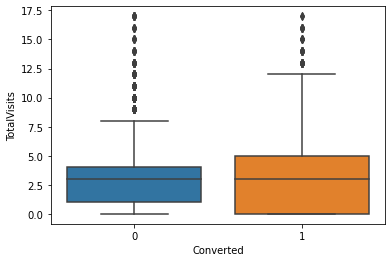

In [58]:
#checking Spread of "Total Visits" vs "Converted" variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Median for converted and not converted leads are the close.
Nothng more can be said on the basis of Total Visits

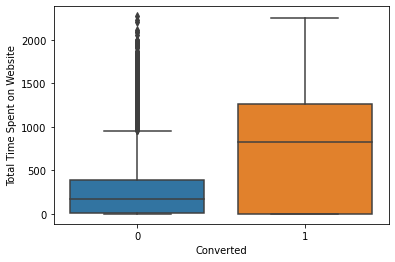

In [59]:
#checking Spread of "Total Time Spent on Website" vs "Converted" variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

- Leads spending more time on the website are more likely to be converted.
- Website should be attractive enough to hold the attention of visitor and keep them engage

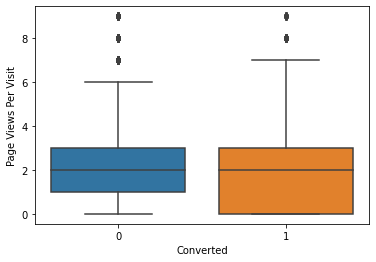

In [60]:
#checking Spread of "Page Views Per Visit" vs "Converted" variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

- While the median look same, other values differs in both box plots 

<AxesSubplot:>

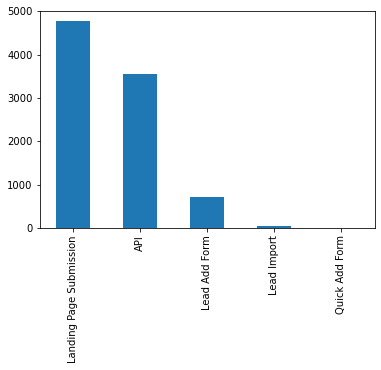

In [61]:
df['Lead Origin'].value_counts().plot.bar()

- it shows the high lead origin is Landing page submission over any other available channels

<AxesSubplot:>

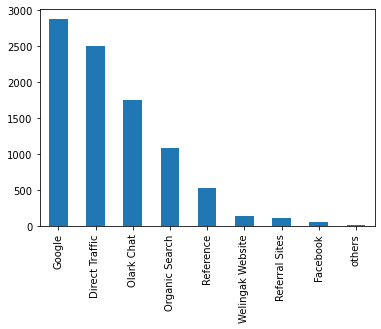

In [62]:
df['Lead Source'].value_counts().plot.bar()

- Maximum leads popping up from Google , followed by Direct traffic, olark chat, organic search, so on and so forth 

<AxesSubplot:>

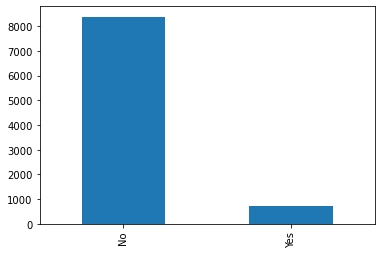

In [63]:
df['Do Not Email'].value_counts().plot.bar()

- Maximum people have opted for No email, so this column does not hold any significant role

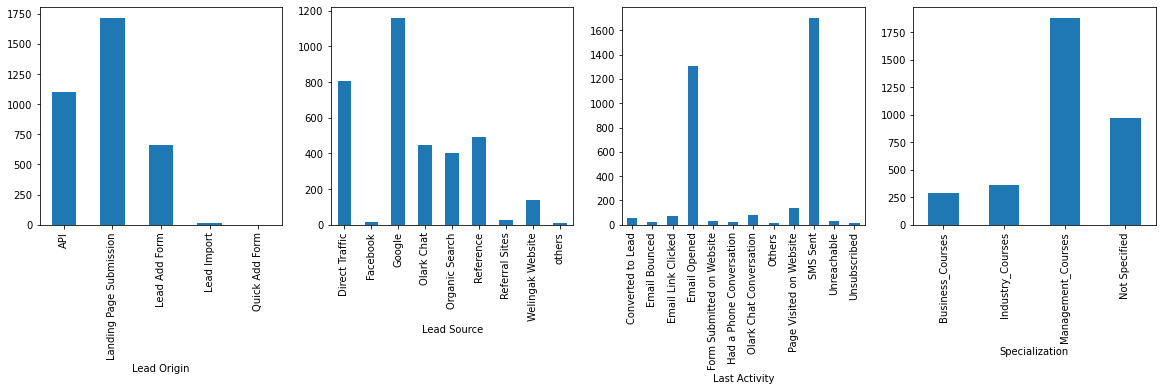

In [64]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
df.groupby(['Lead Origin'])['Converted'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.subplot(1,4,2)
df.groupby(['Lead Source'])['Converted'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.subplot(1,4,3)
df.groupby(['Last Activity'])['Converted'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.subplot(1,4,4)
df.groupby(['Specialization'])['Converted'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Visualizing Numerical variable and coorelation between them 

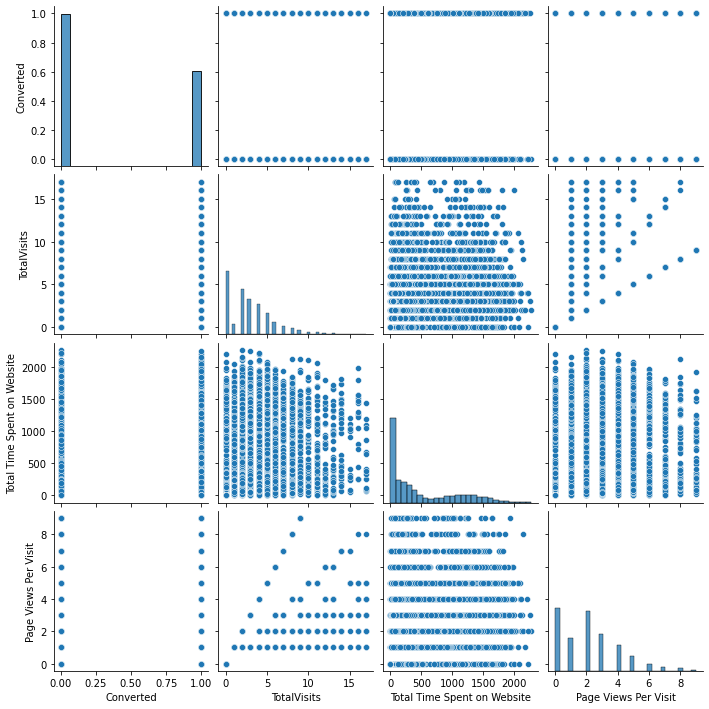

In [65]:
sns.pairplot(df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

- Total visits and page views per visit seems to have some coorelation

## Box plot of Numerical variable 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

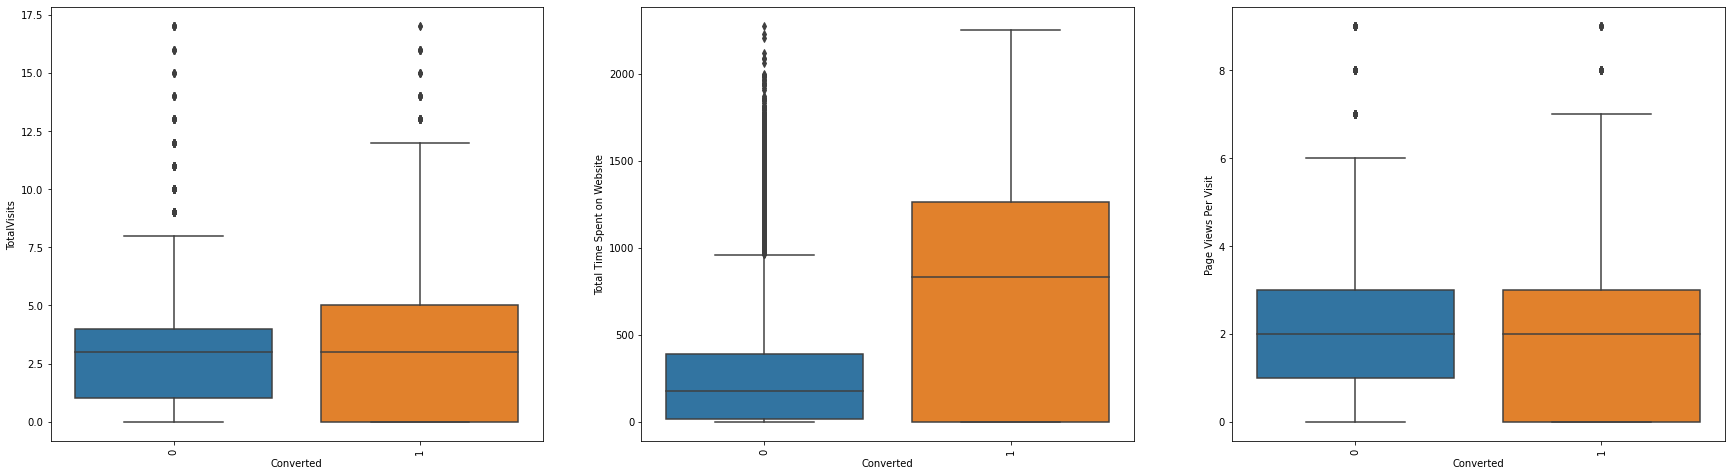

In [66]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Converted',y='TotalVisits')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Converted',y='Total Time Spent on Website')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(data=df,x='Converted',y='Page Views Per Visit')
plt.xticks(rotation=90)


### Data looks ready for modelling after EDA

In [67]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Dummy Variable Creation 

In [68]:
#for modelling , we have to drop these variables because they are generated by sales team

df.drop(['Last Activity','Last Notable Activity','Tags'],inplace=True,axis=1)

In [69]:
# converting binary variables into 0 and 1
def binary_var(x):
    return x.map({'Yes' : 1, 'No' : 0})

binary= ['Do Not Call','Do Not Email','Search','A free copy of Mastering The Interview','Through Recommendations',
         'Digital Advertisement']

df[binary]=df[binary].apply(binary_var)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0,0,Unknown,Not Specified,Unemployed,Better Career Prospects,0,No,No,No,0,0,Unknown,0
1,API,Organic Search,0,0,0,5,674,2,India,Not Specified,Unemployed,Better Career Prospects,0,No,No,No,0,0,Unknown,0
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,India,Business_Courses,Others,Better Career Prospects,0,No,No,No,0,0,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,India,Industry_Courses,Unemployed,Better Career Prospects,0,No,No,No,0,0,Mumbai,0
4,Landing Page Submission,Google,0,0,1,2,1428,1,India,Not Specified,Unemployed,Better Career Prospects,0,No,No,No,0,0,Mumbai,0


### Treating categorical variable 

In [70]:
LO=pd.get_dummies(df['Lead Origin'],prefix='Lead_Origin')
LS=pd.get_dummies(df['Lead Source'],prefix="Lead_source")
SP=pd.get_dummies(df['Specialization'],prefix="Specialization")
CO=pd.get_dummies(df['Country'],prefix="Country")
CR=pd.get_dummies(df['What is your current occupation'],prefix="Current_Occu")
Course=pd.get_dummies(df['What matters most to you in choosing a course'],prefix="Choosing_Course")
NA=pd.get_dummies(df['Newspaper Article'],prefix='Newspaper Article')
XE=pd.get_dummies(df['X Education Forums'],prefix='X Education Forums')
NW=pd.get_dummies(df['Newspaper'],prefix='Newspaper')
CT=pd.get_dummies(df['City'],prefix='City')


df=pd.concat([LO,LS,SP,CO,CR,Course,NA,XE,NW,CT,df],axis=1)
df.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_source_Direct Traffic,Lead_source_Facebook,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,1,0,0,0,0,0,0,0,1,0,...,Unemployed,Better Career Prospects,0,No,No,No,0,0,Unknown,0
1,1,0,0,0,0,0,0,0,0,1,...,Unemployed,Better Career Prospects,0,No,No,No,0,0,Unknown,0
2,0,1,0,0,0,1,0,0,0,0,...,Others,Better Career Prospects,0,No,No,No,0,0,Mumbai,1
3,0,1,0,0,0,1,0,0,0,0,...,Unemployed,Better Career Prospects,0,No,No,No,0,0,Mumbai,0
4,0,1,0,0,0,0,0,1,0,0,...,Unemployed,Better Career Prospects,0,No,No,No,0,0,Mumbai,0


In [71]:
df.shape
#total 59 columns 

(9090, 59)

In [72]:
df.drop(['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','What matters most to you in choosing a course',
         'Newspaper Article','X Education Forums',
         'Newspaper','City'],inplace=True,axis=1)

#dropping original columns after dummy creation 

In [73]:
df.head()
#left with 49 columns 

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_source_Direct Traffic,Lead_source_Facebook,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,...,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,5,674,2,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,2,1532,2,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,305,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,2,1428,1,0,0,0,0


# Model Building 
### starting with train_test_split

In [74]:
X=df.drop(['Converted'],axis=1)
y=df['Converted']

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [76]:
# feature scaling 
# using standardscaler 
from sklearn.preprocessing import StandardScaler

In [77]:
#scaling only numerical variable 
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_source_Direct Traffic,Lead_source_Facebook,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,...,City_Unknown,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
302,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1.340545,-0.428736,-0.080064,0,0,0,0
6087,1,0,0,0,0,0,0,0,1,0,...,1,1,0,-1.070195,-0.887355,-1.140306,0,0,0,0
1033,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0.651762,-0.025151,1.510299,0,0,0,0
7656,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0.996153,-0.241619,2.040420,0,0,0,1
3241,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0.307371,0.897591,-0.610185,0,0,0,1


In [78]:
df.info()
# data_type integar, all columns sorted 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Lead_Origin_API                            9090 non-null   uint8
 1   Lead_Origin_Landing Page Submission        9090 non-null   uint8
 2   Lead_Origin_Lead Add Form                  9090 non-null   uint8
 3   Lead_Origin_Lead Import                    9090 non-null   uint8
 4   Lead_Origin_Quick Add Form                 9090 non-null   uint8
 5   Lead_source_Direct Traffic                 9090 non-null   uint8
 6   Lead_source_Facebook                       9090 non-null   uint8
 7   Lead_source_Google                         9090 non-null   uint8
 8   Lead_source_Olark Chat                     9090 non-null   uint8
 9   Lead_source_Organic Search                 9090 non-null   uint8
 10  Lead_source_Reference                      9090 

- First model using GLM technique

In [79]:
# Logistic regression model 
logm1 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 May 2022   Deviance:                   1.2471e+05
Time:                        22:25:04   Pearson chi2:                 6.10e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Lead_Origin_API                           -1.606e+14   1.95e+07  -8.24e+06      0.000   -1.61e+14   -1.61e+14
Lead_Origin_Landing Page Submission       -6.753e+14   1.92e+07  -3.51e+07      0.000   -6.75e+14   -6.75e+14
Lead_Origin_Lead Add Form                  2.016e+15   2.17e+07   9.29e+07      0.000    2.02e+15    2.02e+15
Lead_Origin_Lead Import                    3.121e+15   5.67e+07    5.5e+07      0.000    3.12e+15    3.12e+15
Lead_Origin_Quick Add Form                -1.094e+15   5.65e+07  -1.94e+07      0.000   -1.09e+15   -1.09e+15
Lead_source_Direct Traffic                 8.188e+14   9.06e+06   9.03e+07      0.000    8.19e+14    8.19e+14
Lead_source_Facebook                      -2.558e+15   6.01e+07  -4.26e+07      0.000   -2.56e+15   -2.56e+15
Lead_source_Google                         5.752e+14   8.91e+06   6.45e+07      0.000    5.75e+14    5.75e+14
Lead_source_Olark Chat                     2.526e+14   1.06e+07   2.39e+07      0.000    2.53e+14    2.53e+14
Lead_source_Organic Search                 7.617e+14   9.16e+06   8.32e+07      0.000    7.62e+14    7.62e+14
Lead_source_Reference                      1.977e+14   1.35e+07   1.46e+07      0.000    1.98e+14    1.98e+14
Lead_source_Referral Sites                 3.328e+14   1.11e+07   2.99e+07      0.000    3.33e+14    3.33e+14
Lead_source_Welingak Website               1.395e+15   1.43e+07   9.79e+07      0.000     1.4e+15     1.4e+15
Lead_source_others                          1.43e+15   1.74e+07   8.21e+07      0.000    1.43e+15    1.43e+15
Specialization_Business_Courses            9.343e+14   4.26e+06   2.19e+08      0.000    9.34e+14    9.34e+14
Specialization_Industry_Courses            9.738e+14   4.17e+06   2.34e+08      0.000    9.74e+14    9.74e+14
Specialization_Management_Courses          8.416e+14   3.73e+06   2.25e+08      0.000    8.42e+14    8.42e+14
Specialization_Not Specified               4.567e+14   4.52e+06   1.01e+08      0.000    4.57e+14    4.57e+14
Country_India                              1.121e+15   5.33e+06    2.1e+08      0.000    1.12e+15    1.12e+15
Country_Outside India                       8.25e+14   6.09e+06   1.35e+08      0.000    8.25e+14    8.25e+14
Country_Unknown                            1.261e+15   6.26e+06   2.02e+08      0.000    1.26e+15    1.26e+15
Current_Occu_Others                        1.945e+15   6.99e+06   2.78e+08      0.000    1.94e+15    1.94e+15
Current_Occu_Unemployed                    1.262e+15   6.92e+06   1.82e+08      0.000    1.26e+15    1.26e+15
Choosing_Course_Better Career Prospects     1.18e+15   1.52e+07   7.76e+07      0.000    1.18e+15    1.18e+15
Choosing_Course_Flexibility & Convenience  1.714e+15   3.34e+07   5.14e+07      0.000    1.71e+15    1.71e+15
Cho

In [80]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [81]:
#Automated approach using RFE, will go for 17 columns to begin with

In [82]:
from sklearn.feature_selection import RFE

In [83]:
rfe=RFE(logreg,17)
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([False,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False])

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead_Origin_API', False, 6),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Origin_Quick Add Form', False, 31),
 ('Lead_source_Direct Traffic', False, 7),
 ('Lead_source_Facebook', True, 1),
 ('Lead_source_Google', False, 28),
 ('Lead_source_Olark Chat', False, 21),
 ('Lead_source_Organic Search', False, 14),
 ('Lead_source_Reference', False, 3),
 ('Lead_source_Referral Sites', False, 13),
 ('Lead_source_Welingak Website', True, 1),
 ('Lead_source_others', True, 1),
 ('Specialization_Business_Courses', False, 22),
 ('Specialization_Industry_Courses', False, 19),
 ('Specialization_Management_Courses', False, 20),
 ('Specialization_Not Specified', True, 1),
 ('Country_India', False, 9),
 ('Country_Outside India', False, 8),
 ('Country_Unknown', True, 1),
 ('Current_Occu_Others', True, 1),
 ('Current_Occu_Unemployed', True, 1),
 ('Choosing_Course_Better Career Prospects', True, 1),
 ('Choosing_C

In [85]:
col=X_train.columns[rfe.support_]

In [86]:
X_train.columns[~rfe.support_]

Index(['Lead_Origin_API', 'Lead_Origin_Quick Add Form',
       'Lead_source_Direct Traffic', 'Lead_source_Google',
       'Lead_source_Olark Chat', 'Lead_source_Organic Search',
       'Lead_source_Reference', 'Lead_source_Referral Sites',
       'Specialization_Business_Courses', 'Specialization_Industry_Courses',
       'Specialization_Management_Courses', 'Country_India',
       'Country_Outside India', 'Choosing_Course_Flexibility & Convenience',
       'Choosing_Course_Other', 'Newspaper Article_Yes',
       'X Education Forums_No', 'Newspaper_No', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Do Not Call', 'TotalVisits',
       'Page Views Per Visit', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [87]:
## Assessing model using statsmodel 

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 May 2022   Deviance:                   1.3300e+05
Time:                        22:25:06   Pearson chi2:                 6.50e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2.993e+15   5.49e+07   5.45e+07      0.000    2.99e+15    2.99e+15
Lead_Origin_Landing Page Submission     -7.278e+14   3.39e+06  -2.15e+08      0.000   -7.28e+14   -7.28e+14
Lead_Origin_Lead Add Form                8.981e+14   4.28e+06    2.1e+08      0.000    8.98e+14    8.98e+14
Lead_Origin_Lead Import                  3.712e+15   6.82e+07   5.44e+07      0.000    3.71e+15    3.71e+15
Lead_source_Facebook                    -4.907e+15   6.73e+07  -7.29e+07      0.000   -4.91e+15   -4.91e+15
Lead_source_Welingak Website              1.55e+13   7.62e+06   2.03e+06      0.000    1.55e+13    1.55e+13
Lead_source_others                       9.618e+14   1.74e+07   5.53e+07      0.000    9.62e+14    9.62e+14
Specialization_Not Specified            -3.157e+14   3.75e+06  -8.42e+07      0.000   -3.16e+14   -3.16e+14
Country_Unknown                           4.79e+14   2.84e+06   1.69e+08      0.000    4.79e+14    4.79e+14
Current_Occu_Others                      1.899e+15   2.75e+07    6.9e+07      0.000     1.9e+15     1.9e+15
Current_Occu_Unemployed                  1.094e+15   2.75e+07   3.98e+07      0.000    1.09e+15    1.09e+15
Choosing_Course_Better Career Prospects  1.893e+15   4.76e+07   3.98e+07      0.000    1.89e+15    1.89e+15
Choosing_Course_Not Specified            1.733e+14   4.76e+07   3.64e+06      0.000    1.73e+14    1.73e+14
Newspaper Article_No                    -5.306e+15   6.72e+07  -7.89e+07      0.000   -5.31e+15   -5.31e+15
Newspaper_Yes                           -4.276e+15   6.73e+07  -6.36e+07      0.000   -4.28e+15   -4.28e+15
City_Unknown                            -6.006e+14   3.89e+06  -1.54e+08      0.000   -6.01e+14   -6.01e+14
Do Not Email                            -7.888e+14   3.19e+06  -2.47e+08      0.000   -7.89e+14   -7.89e+14
Total Time Spent on Website              1.753e+14   9.54e+05   1.84e+08      0.000    1.75e+14    1.75e+14
===========================================================================================================
"""

In [89]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

302     0.0
6087    0.0
1033    0.0
7656    0.0
3241    1.0
5738    0.0
7366    1.0
3680    0.0
4170    1.0
43      0.0
dtype: float64

In [90]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [91]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0


In [92]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
#kept 0.5 cutoff to begin with
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,1,1.0,1


In [93]:
#confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3114  821]
 [ 623 1805]]


In [94]:
#predicted    not_converted   converted 
#actual 
#not_churn       3522           480
#churn            958           1508

In [95]:
#over all accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7730630205877731


In [96]:
##checking VIF's

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,Current_Occu_Unemployed,5767.42
8,Current_Occu_Others,3813.32
11,Choosing_Course_Not Specified,670.40
10,Choosing_Course_Better Career Prospects,668.71
2,Lead_Origin_Lead Import,37.02
3,Lead_source_Facebook,37.02
14,City_Unknown,5.15
6,Specialization_Not Specified,4.64
0,Lead_Origin_Landing Page Submission,4.04
7,Country_Unknown,2.24


In [97]:
#lets drop Tags_number not provided since its P value
col=col.drop('Current_Occu_Unemployed')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_source_Facebook',
       'Lead_source_Welingak Website', 'Lead_source_others',
       'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'Choosing_Course_Not Specified', 'Newspaper Article_No',
       'Newspaper_Yes', 'City_Unknown', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [98]:
#lets rerun the model using the selected variables - Model-2
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.7
Date:                Tue, 10 May 2022   Deviance:                       5701.5
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      20.3344   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead_Origin_Landing Page Submission        -0.9833      0.133     -7.419      0.000      -1.243      -0.724
Lead_Origin_Lead Add Form                   2.2730      0.204     11.124      0.000       1.873       2.673
Lead_Origin_Lead Import                    19.3456   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead_source_Facebook                      -21.4033   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead_source_Welingak Website                3.2206      1.026      3.139      0.002       1.210       5.231
Lead_source_others                          0.8306      0.679      1.223      0.221      -0.500       2.161
Specialization_Not Specified               -0.6725      0.146     -4.607      0.000      -0.959      -0.386
Country_Unknown                             1.0391      0.116      8.988      0.000       0.812       1.266
Current_Occu_Others                         1.4223      0.121     11.735      0.000       1.185       1.660
Choosing_Course_Better Career Prospects     2.4614      2.296      1.072      0.284      -2.038       6.961
Choosing_Course_Not Specified              -0.2253      2.297     -0.098      0.922      -4.728       4.278
Newspaper Article_No                      -22.5344   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper_Yes                             -22.8782   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
City_Unknown                               -0.6126      0.158     -3.878      0.000      -0.922      -0.303
Do Not Email                               -1.2348      0.158     -7.810      0.000      -1.545      -0.925
Total Time Spent on Website                 1.0861      0.039     28.036      0.000       1.010       1.162
===========================================================================================================
"""

In [99]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,Newspaper Article_No,2128.13
9,Choosing_Course_Better Career Prospects,1504.97
10,Choosing_Course_Not Specified,642.38
2,Lead_Origin_Lead Import,37.23
3,Lead_source_Facebook,37.23
13,City_Unknown,8.65
0,Lead_Origin_Landing Page Submission,8.50
6,Specialization_Not Specified,7.39
8,Current_Occu_Others,5.20
7,Country_Unknown,3.06


In [100]:
col=col.drop('Newspaper Article_No')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_source_Facebook',
       'Lead_source_Welingak Website', 'Lead_source_others',
       'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'Choosing_Course_Not Specified', 'Newspaper_Yes', 'City_Unknown',
       'Do Not Email', 'Total Time Spent on Website'],
      dtype='object')

In [101]:
#lets rerun the model using the selected variables - Model -3 
X_train_sm=sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.0
Date:                Tue, 10 May 2022   Deviance:                       5704.0
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1992      2.295     -0.958      0.338      -6.698       2.299
Lead_Origin_Landing Page Submission        -0.9718      0.132     -7.348      0.000      -1.231      -0.713
Lead_Origin_Lead Add Form                   2.2752      0.204     11.138      0.000       1.875       2.676
Lead_Origin_Lead Import                    18.3595   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead_source_Facebook                      -20.4097   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead_source_Welingak Website                3.2174      1.026      3.136      0.002       1.207       5.228
Lead_source_others                          0.8293      0.679      1.221      0.222      -0.502       2.160
Specialization_Not Specified               -0.6669      0.146     -4.571      0.000      -0.953      -0.381
Country_Unknown                             1.0379      0.116      8.981      0.000       0.811       1.264
Current_Occu_Others                         1.4217      0.121     11.732      0.000       1.184       1.659
Choosing_Course_Better Career Prospects     2.4505      2.296      1.067      0.286      -2.050       6.951
Choosing_Course_Not Specified              -0.2374      2.298     -0.103      0.918      -4.742       4.267
Newspaper_Yes                             -21.8891   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
City_Unknown                               -0.6043      0.158     -3.829      0.000      -0.914      -0.295
Do Not Email                               -1.2360      0.158     -7.818      0.000      -1.546      -0.926
Total Time Spent on Website                 1.0866      0.039     28.049      0.000       1.011       1.163
===========================================================================================================
"""

In [102]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead_Origin_Lead Import,37.23
3,Lead_source_Facebook,37.23
9,Choosing_Course_Better Career Prospects,10.81
10,Choosing_Course_Not Specified,10.14
12,City_Unknown,8.64
0,Lead_Origin_Landing Page Submission,8.50
6,Specialization_Not Specified,7.39
8,Current_Occu_Others,5.20
7,Country_Unknown,3.05
1,Lead_Origin_Lead Add Form,2.03


In [103]:
col=col.drop('Lead_Origin_Lead Import')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_source_Facebook', 'Lead_source_Welingak Website',
       'Lead_source_others', 'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'Choosing_Course_Not Specified', 'Newspaper_Yes', 'City_Unknown',
       'Do Not Email', 'Total Time Spent on Website'],
      dtype='object')

In [104]:
#lets rerun the model using the selected variables - Model-4
X_train_sm=sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.1
Date:                Tue, 10 May 2022   Deviance:                       5704.2
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1990      2.294     -0.959      0.338      -6.695       2.297
Lead_Origin_Landing Page Submission        -0.9733      0.132     -7.363      0.000      -1.232      -0.714
Lead_Origin_Lead Add Form                   2.2743      0.204     11.134      0.000       1.874       2.675
Lead_source_Facebook                       -2.0783      0.545     -3.813      0.000      -3.147      -1.010
Lead_source_Welingak Website                3.2178      1.026      3.137      0.002       1.207       5.229
Lead_source_others                          0.8294      0.679      1.221      0.222      -0.502       2.160
Specialization_Not Specified               -0.6683      0.146     -4.582      0.000      -0.954      -0.382
Country_Unknown                             1.0390      0.116      8.993      0.000       0.813       1.265
Current_Occu_Others                         1.4202      0.121     11.729      0.000       1.183       1.658
Choosing_Course_Better Career Prospects     2.4518      2.295      1.068      0.285      -2.047       6.951
Choosing_Course_Not Specified              -0.2348      2.297     -0.102      0.919      -4.737       4.268
Newspaper_Yes                             -21.8889   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
City_Unknown                               -0.6049      0.158     -3.833      0.000      -0.914      -0.296
Do Not Email                               -1.2360      0.158     -7.817      0.000      -1.546      -0.926
Total Time Spent on Website                 1.0868      0.039     28.055      0.000       1.011       1.163
===========================================================================================================
"""

In [105]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Choosing_Course_Better Career Prospects,10.79
9,Choosing_Course_Not Specified,10.10
11,City_Unknown,8.64
0,Lead_Origin_Landing Page Submission,8.48
5,Specialization_Not Specified,7.38
7,Current_Occu_Others,5.18
6,Country_Unknown,3.05
1,Lead_Origin_Lead Add Form,2.03
3,Lead_source_Welingak Website,1.34
13,Total Time Spent on Website,1.28


In [106]:
col=col.drop('Newspaper_Yes')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_source_Facebook', 'Lead_source_Welingak Website',
       'Lead_source_others', 'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'Choosing_Course_Not Specified', 'City_Unknown', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [107]:
#lets rerun the model using the selected variables - Model-5
X_train_sm=sm.add_constant(X_train[col])
#logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.7
Date:                Tue, 10 May 2022   Deviance:                       5707.3
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.2004      2.295     -0.959      0.338      -6.698       2.298
Lead_Origin_Landing Page Submission        -0.9818      0.132     -7.429      0.000      -1.241      -0.723
Lead_Origin_Lead Add Form                   2.2748      0.204     11.136      0.000       1.874       2.675
Lead_source_Facebook                       -2.0924      0.545     -3.840      0.000      -3.160      -1.024
Lead_source_Welingak Website                3.2166      1.026      3.136      0.002       1.206       5.227
Lead_source_others                          0.8309      0.679      1.224      0.221      -0.500       2.161
Specialization_Not Specified               -0.6577      0.146     -4.515      0.000      -0.943      -0.372
Country_Unknown                             1.0374      0.116      8.981      0.000       0.811       1.264
Current_Occu_Others                         1.4228      0.121     11.754      0.000       1.186       1.660
Choosing_Course_Better Career Prospects     2.4607      2.296      1.072      0.284      -2.040       6.961
Choosing_Course_Not Specified              -0.2268      2.298     -0.099      0.921      -4.731       4.277
City_Unknown                               -0.6241      0.158     -3.962      0.000      -0.933      -0.315
Do Not Email                               -1.2341      0.158     -7.808      0.000      -1.544      -0.924
Total Time Spent on Website                 1.0845      0.039     28.028      0.000       1.009       1.160
===========================================================================================================
"""

In [108]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Choosing_Course_Better Career Prospects,10.78
9,Choosing_Course_Not Specified,10.10
10,City_Unknown,8.61
0,Lead_Origin_Landing Page Submission,8.47
5,Specialization_Not Specified,7.37
7,Current_Occu_Others,5.18
6,Country_Unknown,3.05
1,Lead_Origin_Lead Add Form,2.03
3,Lead_source_Welingak Website,1.34
12,Total Time Spent on Website,1.28


In [109]:
col=col.drop('Choosing_Course_Not Specified')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_source_Facebook', 'Lead_source_Welingak Website',
       'Lead_source_others', 'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'City_Unknown', 'Do Not Email', 'Total Time Spent on Website'],
      dtype='object')

In [110]:
#lets rerun the model using the selected variables - Model-6
X_train_sm=sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.7
Date:                Tue, 10 May 2022   Deviance:                       5707.3
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.4261      0.192    -12.622      0.000      -2.803      -2.049
Lead_Origin_Landing Page Submission        -0.9823      0.132     -7.438      0.000      -1.241      -0.723
Lead_Origin_Lead Add Form                   2.2755      0.204     11.145      0.000       1.875       2.676
Lead_source_Facebook                       -2.0929      0.545     -3.841      0.000      -3.161      -1.025
Lead_source_Welingak Website                3.2159      1.026      3.135      0.002       1.205       5.227
Lead_source_others                          0.8309      0.679      1.224      0.221      -0.500       2.161
Specialization_Not Specified               -0.6580      0.146     -4.518      0.000      -0.943      -0.373
Country_Unknown                             1.0376      0.115      8.985      0.000       0.811       1.264
Current_Occu_Others                         1.4225      0.121     11.755      0.000       1.185       1.660
Choosing_Course_Better Career Prospects     2.6869      0.138     19.461      0.000       2.416       2.958
City_Unknown                               -0.6246      0.157     -3.967      0.000      -0.933      -0.316
Do Not Email                               -1.2342      0.158     -7.809      0.000      -1.544      -0.924
Total Time Spent on Website                 1.0845      0.039     28.028      0.000       1.009       1.160
===========================================================================================================
"""

In [111]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,City_Unknown,8.24
5,Specialization_Not Specified,6.26
8,Choosing_Course_Better Career Prospects,5.10
0,Lead_Origin_Landing Page Submission,4.73
6,Country_Unknown,2.99
7,Current_Occu_Others,2.89
1,Lead_Origin_Lead Add Form,2.02
3,Lead_source_Welingak Website,1.34
11,Total Time Spent on Website,1.28
2,Lead_source_Facebook,1.12


In [112]:
col=col.drop('Lead_source_others')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_source_Facebook', 'Lead_source_Welingak Website',
       'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'City_Unknown', 'Do Not Email', 'Total Time Spent on Website'],
      dtype='object')

In [113]:
#lets rerun the model using the selected variables - Model - 7
X_train_sm=sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.4
Date:                Tue, 10 May 2022   Deviance:                       5708.8
Time:                        22:25:07   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.4218      0.192    -12.604      0.000      -2.798      -2.045
Lead_Origin_Landing Page Submission        -0.9810      0.132     -7.430      0.000      -1.240      -0.722
Lead_Origin_Lead Add Form                   2.2835      0.204     11.193      0.000       1.884       2.683
Lead_source_Facebook                       -2.0893      0.545     -3.836      0.000      -3.157      -1.022
Lead_source_Welingak Website                3.2080      1.026      3.127      0.002       1.197       5.218
Specialization_Not Specified               -0.6601      0.146     -4.535      0.000      -0.945      -0.375
Country_Unknown                             1.0345      0.115      8.962      0.000       0.808       1.261
Current_Occu_Others                         1.4201      0.121     11.737      0.000       1.183       1.657
Choosing_Course_Better Career Prospects     2.6838      0.138     19.443      0.000       2.413       2.954
City_Unknown                               -0.6211      0.157     -3.946      0.000      -0.930      -0.313
Do Not Email                               -1.2334      0.158     -7.801      0.000      -1.543      -0.924
Total Time Spent on Website                 1.0838      0.039     28.020      0.000       1.008       1.160
===========================================================================================================
"""

In [114]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,City_Unknown,8.23
4,Specialization_Not Specified,6.26
7,Choosing_Course_Better Career Prospects,5.10
0,Lead_Origin_Landing Page Submission,4.73
5,Country_Unknown,2.99
6,Current_Occu_Others,2.89
1,Lead_Origin_Lead Add Form,2.02
3,Lead_source_Welingak Website,1.34
10,Total Time Spent on Website,1.28
2,Lead_source_Facebook,1.12


In [115]:
col=col.drop('City_Unknown')
col

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_source_Facebook', 'Lead_source_Welingak Website',
       'Specialization_Not Specified', 'Country_Unknown',
       'Current_Occu_Others', 'Choosing_Course_Better Career Prospects',
       'Do Not Email', 'Total Time Spent on Website'],
      dtype='object')

In [116]:
#lets rerun the model using the selected variables - model - 8
X_train_sm=sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.2
Date:                Tue, 10 May 2022   Deviance:                       5724.4
Time:                        22:25:08   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.6086      0.186    -14.024      0.000      -2.973      -2.244
Lead_Origin_Landing Page Submission        -0.7575      0.118     -6.411      0.000      -0.989      -0.526
Lead_Origin_Lead Add Form                   2.2916      0.204     11.244      0.000       1.892       2.691
Lead_source_Facebook                       -1.5793      0.526     -3.003      0.003      -2.610      -0.549
Lead_source_Welingak Website                3.2393      1.026      3.158      0.002       1.229       5.250
Specialization_Not Specified               -1.0042      0.119     -8.471      0.000      -1.237      -0.772
Country_Unknown                             0.9909      0.114      8.663      0.000       0.767       1.215
Current_Occu_Others                         1.3782      0.121     11.408      0.000       1.141       1.615
Choosing_Course_Better Career Prospects     2.6462      0.138     19.189      0.000       2.376       2.916
Do Not Email                               -1.2459      0.158     -7.889      0.000      -1.556      -0.936
Total Time Spent on Website                 1.0818      0.039     28.043      0.000       1.006       1.157
===========================================================================================================
"""

In [117]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,Choosing_Course_Better Career Prospects,4.24
0,Lead_Origin_Landing Page Submission,4.04
5,Country_Unknown,2.95
4,Specialization_Not Specified,2.85
6,Current_Occu_Others,2.47
1,Lead_Origin_Lead Add Form,2.02
3,Lead_source_Welingak Website,1.33
9,Total Time Spent on Website,1.28
8,Do Not Email,1.11
2,Lead_source_Facebook,1.03


### VIF and P value is under control , we are freezing this model 

In [118]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06306431, 0.03077946, 0.2701473 , 0.09732556, 0.56242298,
       0.05303006, 0.60884648, 0.06428365, 0.54082996, 0.0753451 ])

In [119]:
y_train_pred_final['Converted_Prob']=y_train_pred
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.063064,0
1,0,0.030779,0
2,0,0.270147,0
3,0,0.097326,0
4,1,0.562423,1


In [120]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7996228194247996


### the accuracy is practically same, lets check the VIF again

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Choosing_Course_Better Career Prospects,4.24
0,Lead_Origin_Landing Page Submission,4.04
5,Country_Unknown,2.95
4,Specialization_Not Specified,2.85
6,Current_Occu_Others,2.47
1,Lead_Origin_Lead Add Form,2.02
3,Lead_source_Welingak Website,1.33
9,Total Time Spent on Website,1.28
8,Do Not Email,1.11
2,Lead_source_Facebook,1.03


### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3458,  477],
       [ 798, 1630]], dtype=int64)

In [123]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7996228194247996


## Metrics beyond simply accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.671334431630972

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8787801778907243

In [127]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12121982210927573


In [128]:
# positive predictive value 
print (TP / float(TP+FP))

0.7736117702895111


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8125


In [130]:
## Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

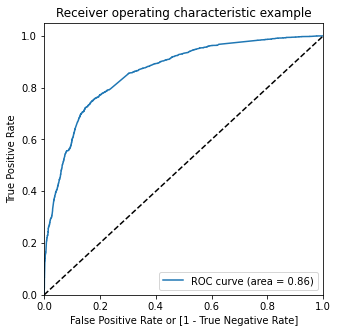

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063064,0,1,0,0,0,0,0,0,0,0,0
1,0,0.030779,0,1,0,0,0,0,0,0,0,0,0
2,0,0.270147,0,1,1,1,0,0,0,0,0,0,0
3,0,0.097326,0,1,0,0,0,0,0,0,0,0,0
4,1,0.562423,1,1,1,1,1,1,1,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.599717  0.967875  0.372554
0.2   0.2  0.694798  0.907331  0.563659
0.3   0.3  0.783278  0.782537  0.783736
0.4   0.4  0.800251  0.731878  0.842440
0.5   0.5  0.799623  0.671334  0.878780
0.6   0.6  0.777306  0.564662  0.908513
0.7   0.7  0.759862  0.466639  0.940788
0.8   0.8  0.724972  0.327842  0.970013
0.9   0.9  0.695112  0.216639  0.990343


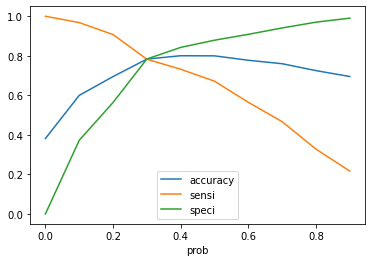

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063064,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.030779,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.270147,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.097326,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.562423,1,1,1,1,1,1,1,0,0,0,0,1


In [137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7832783278327833

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3084,  851],
       [ 528, 1900]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7825370675453048

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.783735705209657

In [142]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21626429479034306


In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6906579425663395


In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8538205980066446


# Precision and Recall

In [145]:
#Looking at the confusion matrix again

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3458,  477],
       [ 798, 1630]], dtype=int64)

## Precision
### TP / TP + FP

In [147]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7736117702895111

In [148]:
## Recall
#TP / TP + FN
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.671334431630972

In [149]:
#f1 score 
F1_score=2*(precision*Recall)/(precision+Recall)
F1_score

0.7188533627342888

In [150]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7736117702895111

In [152]:
#Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Predicted, Length: 6363, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

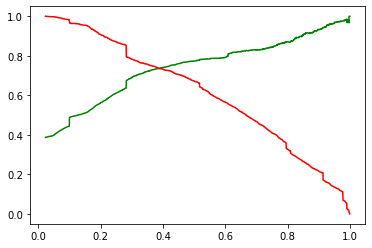

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [157]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [158]:
X_test = X_test[col]
X_test.head()

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_source_Facebook,Lead_source_Welingak Website,Specialization_Not Specified,Country_Unknown,Current_Occu_Others,Choosing_Course_Better Career Prospects,Do Not Email,Total Time Spent on Website
6906,1,0,0,0,0,0,0,1,0,1.919395
1873,1,0,0,0,1,0,0,1,0,-0.546142
771,0,0,0,0,1,0,0,1,0,-0.797465
4495,1,0,0,0,0,0,0,1,0,-0.623190
9061,1,0,0,0,0,0,1,0,0,2.392690


In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
#Making predictions on the test set

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

6906    0.795167
1873    0.089888
771     0.138317
4495    0.198749
9061    0.645737
4929    0.631060
2308    0.097655
1034    0.130245
9033    0.169300
7008    0.817757
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

,0
6906,0.795167
1873,0.089888
771,0.138317
4495,0.198749
9061,0.645737


In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,0
0,1,0.795167
1,0,0.089888
2,0,0.138317
3,0,0.198749
4,1,0.645737


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [170]:
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.795167
1,0,0.089888
2,0,0.138317
3,0,0.198749
4,1,0.645737


In [171]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [172]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.795167,1
1,0,0.089888,0
2,0,0.138317,0
3,0,0.198749,0
4,1,0.645737,1


In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7964796479647965

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1409,  251],
       [ 304,  763]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7150890346766635

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.8487951807228916

In [178]:
##precision=TP / TP + FP
precision1=TP /float(TP + FP)
precision1

0.752465483234714

In [179]:
## Recall
#TP / TP + FN
Recall1 = TP / float(TP + FN)
Recall1

0.7150890346766635

In [180]:
F1_score1=2*(precision1*Recall1)/(precision1+Recall1)
F1_score1

0.7333012974531474

Let us compare the values obtained for Train & Test:


Train - Accuracy : 78.32%    Sensitivity : 70.13%    Specificity : 83.26%
Test  - Accuracy : 79.64%    Sensitivity : 71.50%    Specificity : 84.87%



The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good    calls based on this model